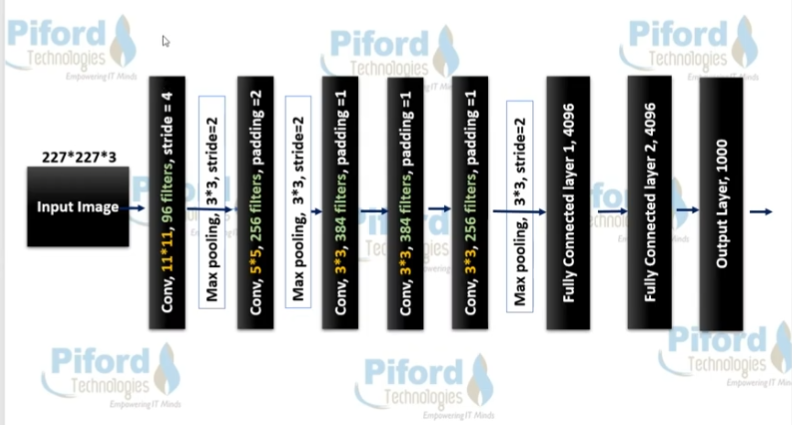

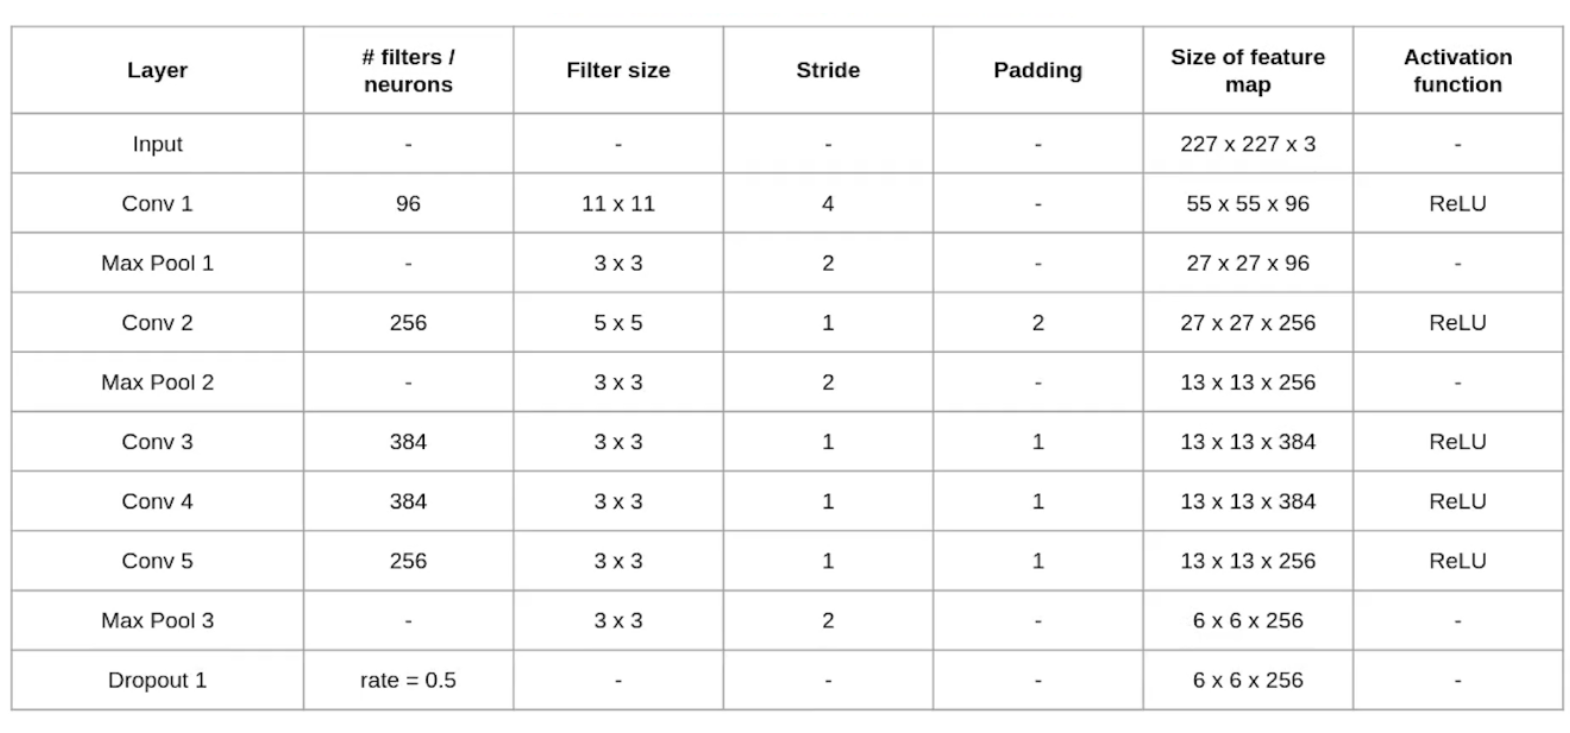
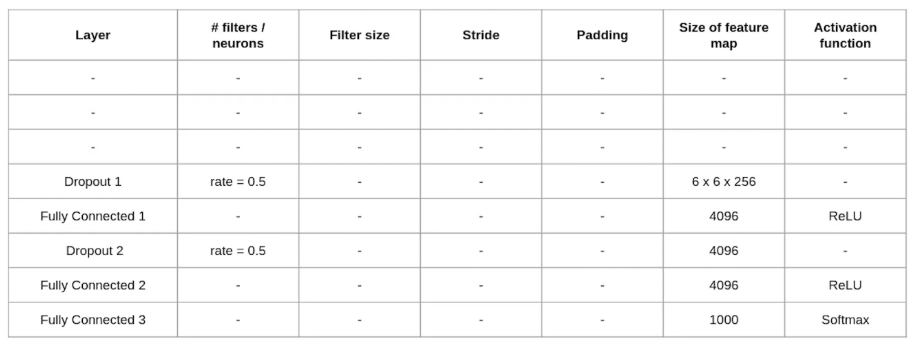

In [ ]:
"""
in ALexnet we are using dropout for reducing overfitting the reason is in alexnet there is huge no of parameter that
can easily make overfit model thats why we use dropout .The drop-out rate is set to be 0.5.
dropout act like ensemble learning :- Dropout ≈ training many different subnetworks
Each mini-batch sees a different architecture
At test time → full network = average of many models
Dropout was the strongest regularization technique available

dropout is used in convolution layer only in AlexNet


Increasing Filters: The number of filters increases as we go deeper, allowing for more complex feature extraction.

Decreasing Filter Size: The filter size reduces in each layer, from larger filters at the beginning to smaller ones deeper in the architecture,
resulting in a smaller feature map shape.




ReLU solved the vanishing gradient problem

Before AlexNet, networks mostly used sigmoid / tanh.
Sigmoid & tanh saturate
Gradients → almost zero
Deep networks learn very slowly
ReLU:
f(x)=max(0,x)
No saturation for positive values
Gradients stay strong
Much faster learning


ReLU introduces sparsity
For x < 0 → output = 0
Many neurons are inactive

ReLU is used in AlexNet because it avoids vanishing gradients, 
enables much faster training, introduces sparsity, and makes deep CNNs computationally efficient.



"""

# https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            # Conv1
            nn.Conv2d(in_channels=3, out_channels=96,
                      kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # Conv2
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # Conv3
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # Conv4
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # Conv5
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),

            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),

            nn.Dropout(p=0.5),

            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, num_classes)
        )


    def forward(self, x):
        x = self.features(x)        
        x = torch.flatten(x, 1)  
        x = self.classifier(x)    
        return x



In [3]:
model = AlexNet(num_classes=1000)
print(model)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

In [ ]:
from torchinfo import summary

summary(
    model,
    input_size=(1, 3, 224, 224), 
    col_names=["input_size", "output_size", "num_params", "trainable"]
)


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
AlexNet                                  [1, 3, 224, 224]          [1, 1000]                 --                        True
├─Sequential: 1-1                        [1, 3, 224, 224]          [1, 256, 6, 6]            --                        True
│    └─Conv2d: 2-1                       [1, 3, 224, 224]          [1, 96, 55, 55]           34,944                    True
│    └─ReLU: 2-2                         [1, 96, 55, 55]           [1, 96, 55, 55]           --                        --
│    └─MaxPool2d: 2-3                    [1, 96, 55, 55]           [1, 96, 27, 27]           --                        --
│    └─Conv2d: 2-4                       [1, 96, 27, 27]           [1, 256, 27, 27]          614,656                   True
│    └─ReLU: 2-5                         [1, 256, 27, 27]          [1, 256, 27, 27]          --                        --
│    └─Ma

In [8]:
import sys
!"{sys.executable}" -m pip install torchinfo


  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys
print(sys.executable)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\python.exe


In [7]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\python.exe
3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
